In [1]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from sklearn.neural_network import MLPClassifier

In [3]:
data_set = pd.read_csv("data/trn.csv", sep=',', header=0, low_memory=False)

In [4]:
#data_set = pd.concat([data_set[data_set.y == 1].iloc[0:20000],data_set[data_set.y == 0].iloc[0:20000]])

In [5]:
data_set = data_set.drop('INDEX', 1)
data_set = data_set.drop('Unnamed: 0', 1)

# encontra as variavies categoricas
for col in data_set.columns:
    if ((data_set[col].quantile() == 1.0) | (data_set[col].quantile() == 0.0)):
        data_set[col] = data_set[col].astype('category')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
correlacoes = data_set.corr()['y']
correlacoes = correlacoes.drop(['y'])

In [8]:
corrr = correlacoes.apply(lambda x: (x*x))
corrr = corrr.to_frame()
todel = []
i = 0

for i in range(0,corrr.shape[0]):
    index = corrr.index[i]
    if corrr.iloc[i][0] < corrr.mean()[0]:
        todel.append(index)

In [9]:
#dt2 = data_set.drop(columns=todel)
dt2 = data_set

In [10]:
X = dt2.loc[:, dt2.columns !='y']
y = dt2.iloc[:, dt2.columns == 'y']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, random_state=42, stratify=y_train)

In [12]:
#from sklearn.neural_network import MLPClassifier

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [14]:
input_dim = X_train.shape[1]

mlp = Sequential()

mlp.add(Dense(8,activation='relu',input_dim = input_dim))
mlp.add(Dense(8,activation='relu'))
mlp.add(Dense(8,activation='relu'))
mlp.add(Dense(8,activation='relu'))
mlp.add(Dense(1, activation='sigmoid'))
mlp.compile(optimizer='adam',loss='mean_squared_error')

history = mlp.fit(X_train, y_train, batch_size=64, epochs= 10000,callbacks=[EarlyStopping(patience=100)], validation_data=[X_val,y_val])

Train on 134098 samples, validate on 67049 samples
Epoch 1/10000
134098/134098 [==============================] - 23s 171us/step - loss: 0.2336 - val_loss: 0.2270
Epoch 2/10000
134098/134098 [==============================] - 18s 134us/step - loss: 0.2261 - val_loss: 0.2244
Epoch 3/10000
134098/134098 [==============================] - 18s 134us/step - loss: 0.2245 - val_loss: 0.2235
Epoch 4/10000
134098/134098 [==============================] - 19s 139us/step - loss: 0.2236 - val_loss: 0.2246
Epoch 5/10000
134098/134098 [==============================] - 19s 140us/step - loss: 0.2233 - val_loss: 0.2229
Epoch 6/10000
134098/134098 [==============================] - 18s 135us/step - loss: 0.2228 - val_loss: 0.2229
Epoch 7/10000
134098/134098 [==============================] - 18s 138us/step - loss: 0.2225 - val_loss: 0.2223
Epoch 8/10000
134098/134098 [==============================] - 18s 137us/step - loss: 0.2224 - val_loss: 0.2231
Epoch 9/10000
134098/134098 [========================

134098/134098 [==============================] - 18s 131us/step - loss: 0.2187 - val_loss: 0.2222
Epoch 74/10000
134098/134098 [==============================] - 17s 130us/step - loss: 0.2186 - val_loss: 0.2216
Epoch 75/10000
134098/134098 [==============================] - 18s 133us/step - loss: 0.2186 - val_loss: 0.2224
Epoch 76/10000
134098/134098 [==============================] - 17s 130us/step - loss: 0.2186 - val_loss: 0.2216
Epoch 77/10000
134098/134098 [==============================] - 18s 132us/step - loss: 0.2186 - val_loss: 0.2217
Epoch 78/10000
134098/134098 [==============================] - 19s 139us/step - loss: 0.2186 - val_loss: 0.2218
Epoch 79/10000
134098/134098 [==============================] - 19s 142us/step - loss: 0.2185 - val_loss: 0.2220
Epoch 80/10000
134098/134098 [==============================] - 19s 139us/step - loss: 0.2186 - val_loss: 0.2215
Epoch 81/10000
134098/134098 [==============================] - 19s 139us/step - loss: 0.2185 - val_loss: 0.221

In [15]:
mlp.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 243),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 8,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_re

In [16]:
#mlp = MLPClassifier(hidden_layer_sizes=(8,8,8,8,),tol=0.0000001, learning_rate_init=0.01,alpha=1e-10, max_iter=10000, random_state=101, verbose=True, learning_rate='constant')
#mlp.fit(X_train.values, y_train.values.ravel())

In [17]:
predicted = mlp.predict(X_test.values)
y_pred_class = mlp.predict_classes(X_test.values)

,0,1
0,33.402437,16.598309
1,19.593133,30.406121


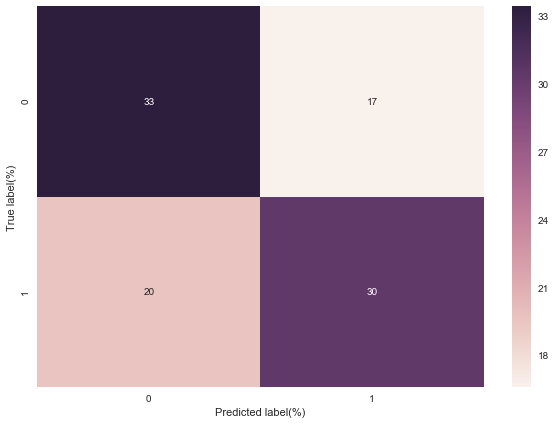

In [18]:
%matplotlib inline
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_class))
tot = cm.sum().sum()
cm = cm.applymap(lambda x: x*100/tot)
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(cm, annot=True)
plt.ylabel('True label(%)')
plt.xlabel('Predicted label(%)')
cm

In [19]:
y_pred_mlp = mlp.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_mlp, pos_label=1)

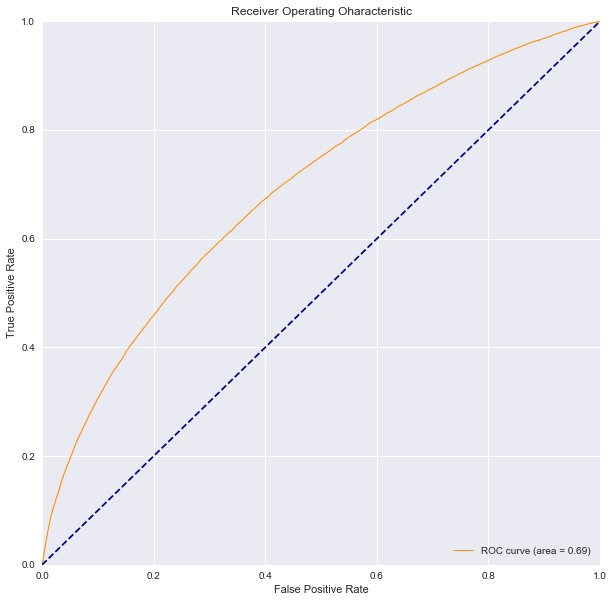

In [20]:
%matplotlib inline
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot(tpr, fpr, color='darkblue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Oharacteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
from scipy import stats

def get_metrics(y, pred, probas):
    accuracy = accuracy_score(y.values, pred)
    recall = recall_score(y.values, pred)
    precision = precision_score(y.values, pred)
    f1 = f1_score(y.values, pred)
    aupr = average_precision_score(y.values, pred)
    fpr, tpr, thresholds = roc_curve(y.values, probas, pos_label=1)
    #ks = stats.ks_2samp(y.iloc[:,0].values, probas)
    return (accuracy, recall, precision, f1, aupr, fpr, tpr, thresholds)

In [22]:
accuracy, recall, precision, f1, aupr, fpr, tpr, thresholds = get_metrics(y_test, y_pred_class, y_pred_mlp)
print("Accuracy score: {:.4}".format(accuracy))
print("Recall score: {:.4}".format(recall))
print("Precision score: {:.4}".format(precision))
print("f1 score: {:.4}".format(f1))
print("aupr: {:.4}".format(aupr))
print("roc: {:.4}".format(roc_auc))

Accuracy score: 0.6381
Recall score: 0.6081
Precision score: 0.6469
f1 score: 0.6269
aupr: 0.5893
roc: 0.6905


In [23]:
import math
from scipy import stats

position = 0
class_0 = 0
class_1 = 0
counting_class_0 = [0] * 101
counting_class_1 = [0] * 101
grouped_counting_class_0 = [0] * 101
grouped_counting_class_1 = [0] * 101
percentage_counting_class_0 = [0.0] * 101
percentage_counting_class_1 = [0.0] * 101

for x in y_test['y']:
    score = math.floor(y_pred_mlp[position]*100)
    if x == 0:
        class_0 = class_0 + 1
        counting_class_0[score] = counting_class_0[score] + 1
    else:
        class_1 = class_1 + 1
        counting_class_1[score]= counting_class_1[score] + 1
    position = position + 1

print(class_0, class_1)

last_value_class_0 = 0
last_value_class_1 = 0

for x in range(0, 101):
    last_value_class_0 += counting_class_0[x]
    grouped_counting_class_0[x] = last_value_class_0
    percentage_counting_class_0[x] = last_value_class_0/class_0
    
    last_value_class_1 += counting_class_1[x]
    grouped_counting_class_1[x] = last_value_class_1
    percentage_counting_class_1[x] = last_value_class_1/class_1

stats.ks_2samp(percentage_counting_class_0, percentage_counting_class_1)
#stats.ks_2samp(grouped_counting_class_0, grouped_counting_class_1)

33525 33524


Ks_2sampResult(statistic=0.16831683168316836, pvalue=0.1024361601437302)

No handles with labels found to put in legend.


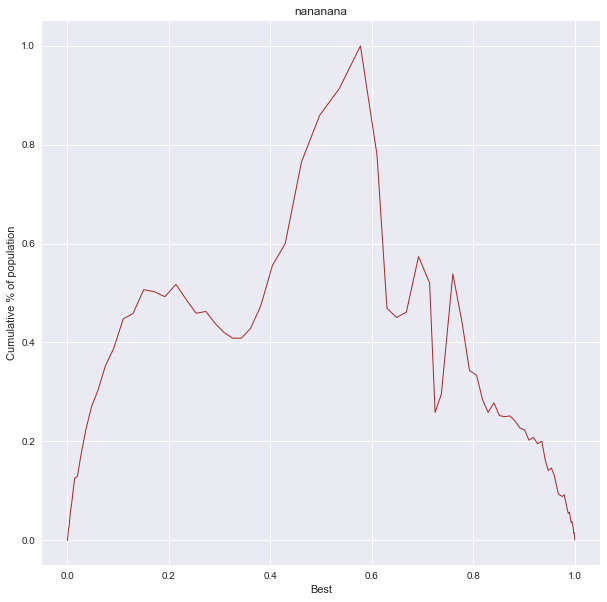

In [24]:
%matplotlib inline

predict_sort = np.sort(list(map(lambda x: x[0], y_pred_mlp)))
#predict_sort = pd.DataFrame(predict_sort).values
count_norm = list(map(lambda x: x/max(counting_class_0), counting_class_0))

plt.figure(figsize=(10,10))
plt.plot(percentage_counting_class_0, count_norm, color='brown', lw=1)
#plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('Best')
plt.ylabel('Cumulative % of population')
plt.title('nananana')
plt.legend(loc="lower right")
plt.show()

In [25]:
the_test = pd.read_csv("data/real_test_set.csv", sep=',', header=0, low_memory=False)
ft_the_test = the_test.drop('id', 1)

In [32]:
mlp_pred_test_class = mlp.predict_classes(ft_the_test.values)
mlp_pred_test_scores = mlp.predict_proba(ft_the_test)

In [35]:
df = pd.DataFrame(data=mlp_pred_test_class)
df.to_csv('test_mlp.csv', mode='a', index=True)

In [34]:
mlp_pred_test_class

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int32)